<a href="https://colab.research.google.com/github/farhanarrafi/UNT-CS-Machine-Learning-Project/blob/ml-farhan/MachineLearning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os.path
import json

api_token = {"username":"farhanarrafi","key":"4b636dec3bba0a0303176626ff2365e3"}


if not os.path.isdir('/root/.kaggle'):
  ! mkdir ~/.kaggle
  ! touch ~/.kaggle/kaggle.json
  with open('/root/.kaggle/kaggle.json', 'w') as file:
      json.dump(api_token, file)
  !chmod 600 ~/.kaggle/kaggle.json

In [2]:
# !pip install --upgrade --force-reinstall --no-deps kaggle

In [3]:
## Download Global Markets Data
if not os.path.isfile('2020_Global_Markets_Data.csv'):
  ! kaggle datasets download -d 'pavankrishnanarne/global-stock-market-2008-present'
  ! unzip global-stock-market-2008-present.zip
  ! rm -rf global-stock-market-2008-present.zip
  ! rm -rf sample_data/

  0% 0.00/1.12M [00:00<?, ?B/s]
100% 1.12M/1.12M [00:00<00:00, 97.6MB/s]
Archive:  global-stock-market-2008-present.zip
  inflating: 2008_Globla_Markets_Data.csv  
  inflating: 2009_Globla_Markets_Data.csv  
  inflating: 2010_Global_Markets_Data.csv  
  inflating: 2011_Global_Markets_Data.csv  
  inflating: 2012_Global_Markets_Data.csv  
  inflating: 2013_Global_Markets_Data.csv  
  inflating: 2014_Global_Markets_Data.csv  
  inflating: 2015_Global_Markets_Data.csv  
  inflating: 2016_Global_Markets_Data.csv  
  inflating: 2017_Global_Markets_Data.csv  
  inflating: 2018_Global_Markets_Data.csv  
  inflating: 2019_Global_Markets_Data.csv  
  inflating: 2020_Global_Markets_Data.csv  
  inflating: 2021_Global_Markets_Data.csv  
  inflating: 2022_Global_Markets_Data.csv  
  inflating: 2023_Global_Markets_Data.csv  


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.pipeline import Pipeline


dataset_global_market_2020 = pd.read_csv('2020_Global_Markets_Data.csv')
#dataset_global_market_2021 = pd.read_csv('2021_Global_Markets_Data.csv')
#dataset_global_market_2022 = pd.read_csv('2022_Global_Markets_Data.csv')
#dataset_global_market_2023 = pd.read_csv('2023_Global_Markets_Data.csv')

if os.path.isfile('2023_Global_Markets_Data.csv'):
  ! rm -rf 2008_Globla_Markets_Data.csv
  ! rm -rf 2009_Globla_Markets_Data.csv
  ! rm -rf 2010_Global_Markets_Data.csv
  ! rm -rf 2011_Global_Markets_Data.csv
  ! rm -rf 2012_Global_Markets_Data.csv
  ! rm -rf 2013_Global_Markets_Data.csv
  ! rm -rf 2014_Global_Markets_Data.csv
  ! rm -rf 2015_Global_Markets_Data.csv
  ! rm -rf 2016_Global_Markets_Data.csv
  ! rm -rf 2017_Global_Markets_Data.csv
  ! rm -rf 2018_Global_Markets_Data.csv
  ! rm -rf 2019_Global_Markets_Data.csv
  ! rm -rf 2021_Global_Markets_Data.csv
  ! rm -rf 2022_Global_Markets_Data.csv
  ! rm -rf 2023_Global_Markets_Data.csv

In [5]:
dataset_global_market_2020.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,^NSEI,2020-01-01,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,3.041000e+05
1,^NYA,2020-01-02,13913.030273,14003.389648,13913.030273,14002.490234,14002.490234,3.459930e+09
2,^IXIC,2020-01-02,9039.459961,9093.429688,9010.889648,9092.190430,9092.190430,2.862700e+09
3,^FTSE,2020-01-02,7542.399902,7624.799805,7542.399902,7604.299805,7604.299805,4.822067e+08
4,^NSEI,2020-01-02,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,4.077000e+05


In [6]:
dataset_global_market_2020.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3012.000000,3012.000000,3012.000000,3012.000000,3012.000000,3.012000e+03
mean,11354.587633,11439.352700,11252.197290,11348.668147,11348.668147,1.307467e+09
std,11563.068508,11637.405991,11464.593780,11553.301603,11553.301603,2.053077e+09
min,-14.000000,13.690000,-40.320000,-37.630001,-37.630001,0.000000e+00
25%,1969.325012,1983.500031,1954.950012,1965.649994,1965.649994,3.127500e+05
50%,7506.250000,7582.750000,7462.205078,7503.589844,7503.589844,1.595500e+08
75%,14405.485107,14446.489746,14317.044678,14399.507568,14399.507568,2.248452e+09
max,47789.031250,47896.968750,47602.121094,47751.328125,47751.328125,9.053950e+09


In [7]:
dataset_global_market_2020['Ticker'].unique()

array(['^NSEI', '^NYA', '^IXIC', '^FTSE', '^BSESN', '000001.SS', '^N100',
       '^DJI', '^GSPC', 'GC=F', 'CL=F', '^N225'], dtype=object)

In [8]:
## Download Stock Market TWEETS

def download_Tweets():
  if not os.path.isfile('Labelled Tweets.csv'):
    ! kaggle datasets download -d 'dawoodaijaz/stock-market-tweets-labelled-with-gcp-nlp'
    ! unzip stock-market-tweets-labelled-with-gcp-nlp.zip
    ! rm -rf stock-market-tweets-labelled-with-gcp-nlp.zip


In [9]:
# dataset_stock_tweets = pd.read_csv('Labelled Tweets.csv')

In [10]:
#dataset_stock_tweets.head()

In [11]:
#dataset_stock_tweets.describe()

In [12]:
## Download Stock Market Data (NASDAQ, NYSE, S&P500)
## kaggle datasets download -d paultimothymooney/stock-market-data
if not os.path.isfile('stock-market-data'):
  ! kaggle datasets download --unzip -q -o 'paultimothymooney/stock-market-data'

## Data Pre-Processing

https://www.kaggle.com/code/alirezahasannejad/data-preprocessing-in-machine-learning

### Python iterate through files in direcotry: https://stackoverflow.com/a/10378012


In [75]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


def getStockFileList():
    stock_sp500_list = []
    directory = os.fsencode('stock_market_data/sp500/csv')
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        if filename.endswith(".csv"):
            stock_sp500_list.append(filename)
    stock_sp500_list.sort()
    return stock_sp500_list

stock_sp500_list = getStockFileList()
#dataset_stock_sp500_AAPL = pd.read_csv('stock_market_data/sp500/csv/AAPL.csv')

In [76]:
# Get Stock as Dataframe
def getStockDataFrame(stock_file='', start='2020', end='2020'):
     dataframe = pd.read_csv(f'stock_market_data/sp500/csv/{stock_file}')
     dataframe.dropna(inplace=True)
     dataframe.reset_index(drop=True,inplace=True)
     dataframe['Date']= pd.to_datetime(dataframe['Date'])
     dataframe = dataframe.loc[(dataframe['Date'].dt.strftime('%Y') >= start) & (dataframe['Date'].dt.strftime('%Y') <= end)]
     return dataframe

df_sp500_1stock = getStockDataFrame(stock_file=stock_sp500_list[1], start='2012', end='2022')

<ipython-input-76-ccf599d05017>:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dataframe['Date']= pd.to_datetime(dataframe['Date'])


In [77]:
df_sp500_1stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2755 entries, 1578 to 4332
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            2755 non-null   datetime64[ns]
 1   Low             2755 non-null   float64       
 2   Open            2755 non-null   float64       
 3   Volume          2755 non-null   int64         
 4   High            2755 non-null   float64       
 5   Close           2755 non-null   float64       
 6   Adjusted Close  2755 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 172.2 KB


In [16]:
df_sp500_1stock.isnull().sum()

Date              0
Low               0
Open              0
Volume            0
High              0
Close             0
Adjusted Close    0
dtype: int64

In [17]:
df_sp500_1stock.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close
1578,2012-03-01,5.07,5.20,6105900,5.22,5.12,4.826837
1579,2012-04-01,4.97,5.09,5268700,5.18,5.03,4.741989
1580,2012-05-01,5.07,5.15,8216100,5.48,5.47,5.156796
1581,2012-06-01,5.40,5.44,8323000,5.67,5.60,5.279352
1582,2012-09-01,5.55,5.56,8029900,5.80,5.72,5.392481


In [18]:
df_sp500_1stock.tail()

,Date,Low,Open,Volume,High,Close,Adjusted Close
4328,2022-06-12,14.00,14.14,20781500,14.34,14.33,14.33
4329,2022-07-12,13.53,14.24,28161400,14.24,13.55,13.55
4330,2022-08-12,13.38,13.65,25300900,13.80,13.60,13.60
4331,2022-09-12,13.42,13.52,18489800,13.66,13.53,13.53
4332,2022-12-12,13.45,13.49,6824831,13.91,13.90,13.90


# Value at Risk (VaR) Method
Suppose $500,000 is invested in stock ABC. The standard deviation over 252 days, or one trading year, of stock ABC, is 7%. Following the normal distribution, the one-sided 95% confidence level has a z-score of 1.645.

The value at risk in this portfolio is

$57,575 = ($500,000 * 1.645 * .07).
Therefore, with 95% confidence, the maximum loss will not exceed $57,575 in a given trading year.

In [19]:
from scipy import stats

std_closing = df_sp500_1stock['Close'].std()
zscore_95 = stats.norm.ppf(.95)

# Considering someone invested $1000, the maximum loss will not exceed:

max_loss = 1000 * zscore_95 * (std_closing/100)
max_loss

226.6242463007629

## Keltner Channels

[Keltner Channels Investopedia](https://www.investopedia.com/terms/k/keltnerchannel.asp)

## Kurtosis
https://www.investopedia.com/terms/k/kurtosis.asp

A high kurtosis value for daily returns may indicate frequent fluctuations in price that deviate significantly from the average returns of that investment, which can lead to increased volatility and risk associated with the stock.

High levels of kurtosis indicate a high concentration of observations in the tails of their daily returns distributions, which suggests that stocks with high kurtosis are subject to high levels of volatility and risk, with considerate price fluctuations that deviate significantly from their average returns.

In [20]:
from scipy.stats import kurtosis

kurt_aapl_2022 = kurtosis(df_sp500_1stock['Close'])

kurt_aapl_2022

-1.3375474093662465

https://www.kaggle.com/code/kratisaxena/stock-market-technical-indicators-visualization

## Average True Range (ATR)

[Average True Range - Investopedia](https://www.investopedia.com/terms/a/atr.asp)

Higher ATR -> Higher Volatility
Lower ATR -> Lower Volatility



In [78]:
def getDataFrameWithATR(stockDF):
    # High - Low
    stockDF['HL'] = stockDF['High']-stockDF['Low']
    # High - Yesterdays closing price
    stockDF['HCp'] = np.abs(stockDF['High']-stockDF['Close'].shift(1))
    # Mean replace 1st NaN with mean of all values
    #df_sp500_1stock.at[0, 'HCp'] = df_sp500_1stock.loc[ : ,'HCp'].mean()
    #df_sp500_1stock.loc[df_sp500_1stock.HCp== np.NaN] = df_sp500_1stock.loc[ : ,'HCp'].mean()
    # Low - Yesterdays closing price
    stockDF['LCp'] = np.abs(stockDF['Low']-stockDF['Close'].shift(1))
    # Mean replace 1st NaN with mean of all values
    #df_sp500_1stock.at[0, 'LCp'] = df_sp500_1stock.loc[ : ,'LCp'].mean()
    #df_sp500_1stock.loc[df_sp500_1stock.LCp== np.NaN] = df_sp500_1stock.loc[ : ,'LCp'].mean()
    # True Range Calulation
    stockDF['TR'] = np.max(stockDF[['HL','HCp','LCp']], axis=1)
    # Average True Range
    stockDF['ATR'] = stockDF['TR'].rolling(14).mean()
    # Fill nulls with 0
    stockDF.fillna(0, inplace = True)
    # Drop last row
    # https://stackoverflow.com/a/46675453
    stockDF.drop(stockDF.tail(1).index, inplace=True)
    return stockDF

In [79]:
def getNormalizedATR(stockDF):
    stockDFwithATR = getDataFrameWithATR(stockDF)
    # Normalized Average True Range
    stockDFwithATR['NATR'] = stockDFwithATR['ATR'] / stockDFwithATR['Close'] * 100
    return stockDFwithATR

In [80]:
df_sp500_1stock = getDataFrameWithATR(df_sp500_1stock)

In [81]:
df_sp500_1stock.tail()

,Date,Low,Open,Volume,High,Close,Adjusted Close,HL,HCp,LCp,TR,ATR
4327,2022-05-12,13.82,13.84,27029000,14.34,14.11,14.11,0.52,0.370000,0.150001,0.52,0.525714
4328,2022-06-12,14.00,14.14,20781500,14.34,14.33,14.33,0.34,0.230000,0.110000,0.34,0.503571
4329,2022-07-12,13.53,14.24,28161400,14.24,13.55,13.55,0.71,0.090000,0.800000,0.80,0.517857
4330,2022-08-12,13.38,13.65,25300900,13.80,13.60,13.60,0.42,0.250000,0.170000,0.42,0.518571
4331,2022-09-12,13.42,13.52,18489800,13.66,13.53,13.53,0.24,0.059999,0.180000,0.24,0.488571


In [82]:
df_sp500_1stock.ATR.describe()

count    2754.000000
mean        1.061920
std         0.429780
min         0.000000
25%         0.733571
50%         1.020357
75%         1.318928
max         2.852143
Name: ATR, dtype: float64

In [83]:
df_sp500_1stock.ATR.mean() - df_sp500_1stock.ATR.std()

0.6321405745874955

<Axes: >

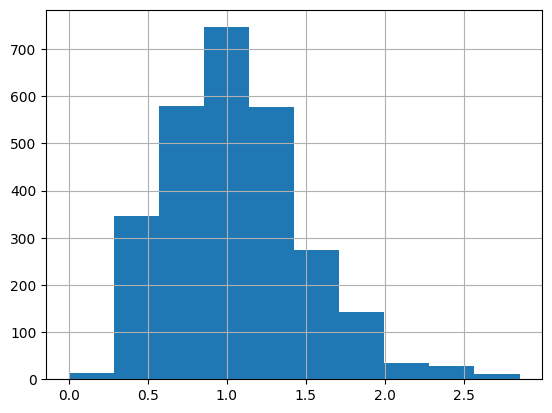

In [84]:
df_sp500_1stock.ATR.hist()

#### Train Test Split

In [85]:
def splitTrainTest(stockDF, train=90):
    # Find number of train test and validation samples
    n_train = int(np.floor(stockDF.shape[0] * train/100))

    X_train = stockDF.iloc[ : n_train, :][['Low','Open','High', 'Close']]
    Y_train = stockDF.iloc[ : n_train, :][['ATR']]

    X_test = stockDF.iloc[n_train : , :][['Low','Open','High', 'Close']]
    Y_test = stockDF.iloc[n_train : , :][['ATR']]

    return X_train, Y_train, X_test, Y_test


def splitTrainTestValidation(stockDF, train=80,test=10):
    # Find number of train test and validation samples
    n_train = int(np.floor(df_sp500_1stock.shape[0] * train/100))
    n_test = int(np.floor(df_sp500_1stock.shape[0] * test/100))

    X_train = stockDF.iloc[ : n_train, :][['Low','Open','High', 'Close']]
    Y_train = stockDF.iloc[ : n_train, :][['ATR']]

    X_test = df_sp500_1stock.iloc[n_train : (n_train+n_test), :][['Low','Open','High', 'Close']]
    Y_test = df_sp500_1stock.iloc[n_train : (n_train+n_test), :][['ATR']]

    X_valid = df_sp500_1stock.iloc[(n_train+n_test) : , :][['Low','Open','High', 'Close']]
    Y_valid = df_sp500_1stock.iloc[(n_train+n_test) : , :][['ATR']]

    return X_train, Y_train, X_test, Y_test, X_valid, Y_valid



In [86]:
X_train, Y_train, X_test, Y_test = splitTrainTest(df_sp500_1stock, train=90)

In [87]:
# Encode to TrueFalse
def encodeTarget(boundary, targetDF):
    return targetDF['ATR'].apply(lambda x: True if x<=boundary else False)


# Decision boundary for risky and non risky price
boundary = df_sp500_1stock.ATR.mean() - df_sp500_1stock.ATR.std()
Y_train_binomial = encodeTarget(boundary, Y_train)
Y_test_binomial = encodeTarget(boundary, Y_test)

In [88]:
Y_train_binomial.values.reshape(-1,)

array([ True,  True,  True, ...,  True,  True,  True])

In [89]:
# Gaussian Naive Bayes
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()

gaussian.fit(X_train, Y_train_binomial.values.reshape(-1,))



GaussianNB()

In [90]:
prediction = gaussian.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test_binomial, prediction)

0.2572463768115942

In [92]:
# Complement Naive Bayes
# https://scikit-learn.org/stable/modules/naive_bayes.html#complement-naive-bayes
from sklearn.naive_bayes import ComplementNB

complement_naive_bayes = ComplementNB()

complement_naive_bayes.fit(X_train, Y_train_binomial.values.reshape(-1,))

ComplementNB()

In [64]:
prediction = complement_naive_bayes.predict(X_test)

accuracy_score(Y_test_binomial, prediction)

0.48727272727272725

In [65]:
# Bayesian Ridge Regression



In [66]:
# Fear & Greed Index

